In [1]:
# fit an ARIMA model and plot residual errors
from datetime import date
import pandas as pd
import pandas_datareader as data
import numpy as np

# fit an ARIMA model and plot residual errors
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score


C:\Users\MuhammadNurAlim\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [70]:
#Saham yang akan dimodelkan
#,"ASII.JK","ICBP.JK","JSMR.JK"
tickers = "ANTM.JK"
#range dari tanggal yang dibutuhkan
today = date.today()
# print(today)
start_date = '2010-01-01'
# end_date = today
end_date = '2022-03-10'
#ambil data
panel_data = data.DataReader(tickers, 'yahoo',start_date, end_date)
panel_data


close = panel_data["Close"]

# # all_weekdays = pd.date_range(start = start_date,    end= end_date, freq='B')

# # close = close.reindex(all_weekdays)

# # close = close.dropna()

# # # #print(all_weekdays)

dataframe = close
dataset = dataframe.values
dataset = dataset.astype('float32')
panel_data.index = pd.DatetimeIndex(panel_data.index).to_period('M')

In [75]:
size = int(len(close) * 0.67)
train, test = close[0:size], close[size:len(close)]


In [53]:
from pmdarima.arima import auto_arima
model = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=4.21 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=20193.218, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=19722.079, Time=0.77 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=20195.015, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=19452.364, Time=1.69 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=8.20 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.47 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=19452.325, Time=1.48 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=19720.896, Time=0.27 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=5.86 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.32 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=19452.332, Time=1.83 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=19453.070, Time=3.53 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2026
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -9723.162
Date:                            Sun, 13 Mar 2022   AIC                          19452.325
Time:                                    02:40:31   BIC                          19469.147
Sample:                                         0   HQIC                         19458.500
                                           - 2026                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6238      0.015    -40.856      0.000      -0.654      -0.594
ar.S.L24      -0.3578      0.016    -22.566      0.000      -0.389      -0.327
sigma2       915.5269     17.195     53.245      0.000     881.826     949.228
===================================================================================
Ljung-Box (L1) (Q):                   1.97   Jarque-Bera (JB):              1309.42
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

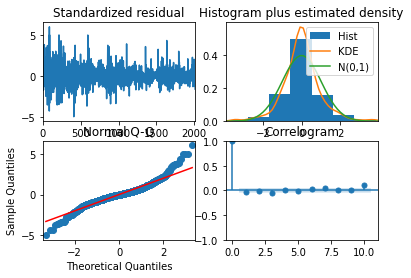

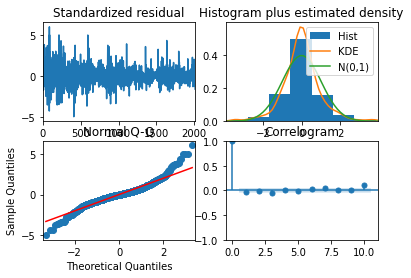

In [54]:
model.plot_diagnostics()

In [81]:
model.fit(train)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)